
讀取資料集檔案

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import plotly.figure_factory as ff
import pydotplus
from scipy.stats import zscore
import sklearn.metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import datasets,cluster,metrics,ensemble
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection,tree
from sklearn import preprocessing,decomposition,model_selection
from sklearn import feature_selection as fs
from mlxtend import plotting
from sklearn.datasets import make_classification
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/大數據的colab/winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


查看資料屬性及內容

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


查看缺失值

In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

查看資料的標準差及平均等等

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


查看資料之間的關係圖

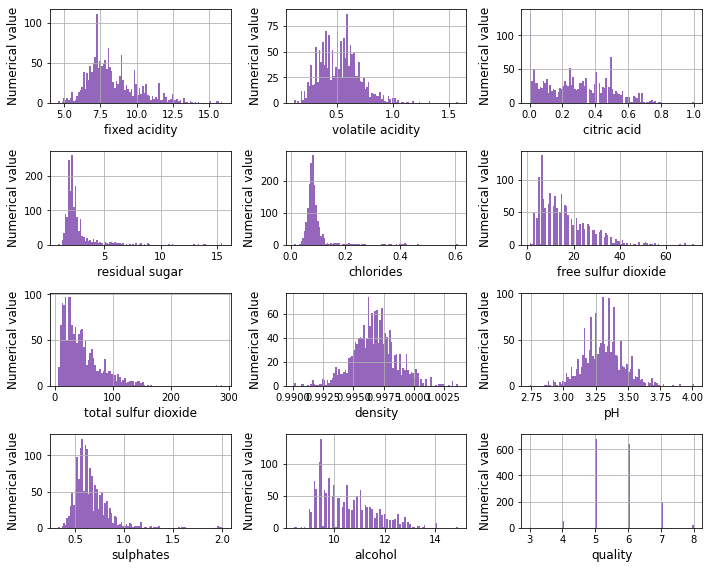

In [5]:
color=sns.color_palette()
column=data.columns.tolist()
fig=plt.figure(figsize=(10,8))
for i in range(12):
  plt.subplot(4,3,i+1)
  data[column[i]].hist(bins=100,color=color[4])
  plt.xlabel(column[i],fontsize=12)
  plt.ylabel('Numerical value',fontsize=12)
plt.tight_layout()

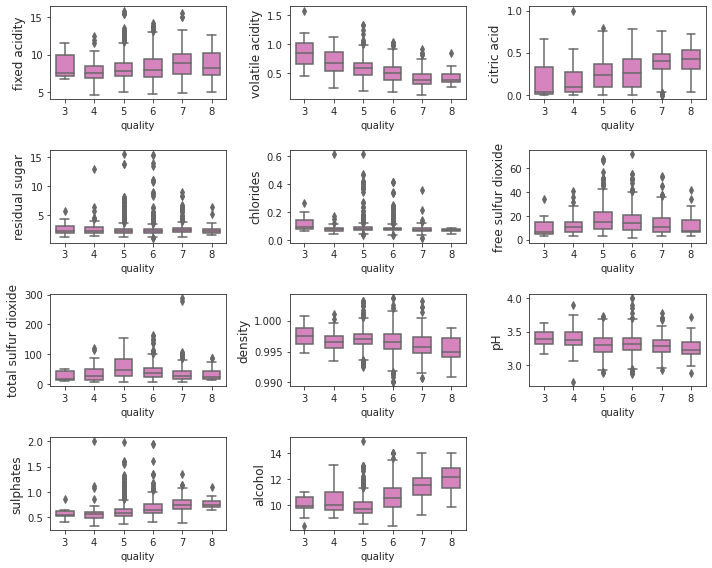

In [6]:
columns=data.columns.tolist()
sns.set_style('ticks')
column=columns[0:11]
plt.figure(figsize=(10,8))
for i in range(11):
  plt.subplot(4,3,i+1)
  sns.boxplot(x='quality',y=column[i],data=data,color=color[6],width=0.6)
  plt.ylabel(column[i],fontsize=12)
plt.tight_layout()

熱圖查看相關性

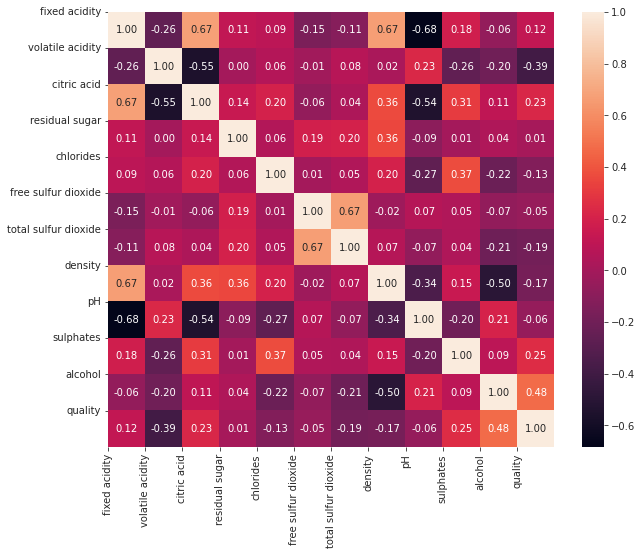

In [7]:
corr=data.corr()
fig,ax= plt.subplots(figsize=(10, 8))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

將紅酒的質量以6.5為界線 以上為品質好的紅酒 以下為品質較差的紅酒

In [8]:
#這邊定義0是較劣質的酒 1是品質優良的酒
#以品質界定6.5為界 以上為優良 以下為劣質
data['quality'] =np.where(data['quality']>6.5,1,0)
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

將待要預測的欄位切割

In [9]:
#分割訓練和預測的因素
X = data.drop('quality',axis=1)
y = data['quality']

分割訓練集測試集

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

KNN

In [11]:
param_grid={'n_neighbors':np.arange(1,50),'weights':['uniform','distance'],'leaf_size':np.arange(1,10)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred=knn_cv.predict(X_test)
print(knn_cv.best_params_)
print('Classification Report')
print(classification_report(y_pred,y_test))

{'leaf_size': 1, 'n_neighbors': 22, 'weights': 'distance'}
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       305
           1       0.26      0.80      0.39        15

    accuracy                           0.88       320
   macro avg       0.62      0.84      0.66       320
weighted avg       0.95      0.88      0.91       320



Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion matrix


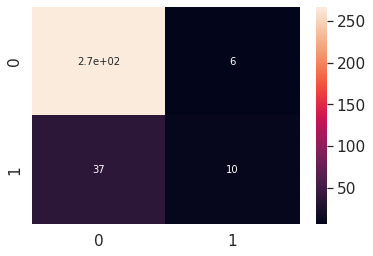

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320



In [13]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)
lrconf_matrix = confusion_matrix(y_test, lr_predict)
lrconf_matrix=pd.DataFrame(lrconf_matrix,range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(lrconf_matrix,annot=True,annot_kws={"size":10})
print('Confusion matrix')
plt.show()
lr_acc_score = accuracy_score(y_test, lr_predict)
print('Classification Report')
print(classification_report(y_test,lr_predict))

隨機森林

Confusion matrix


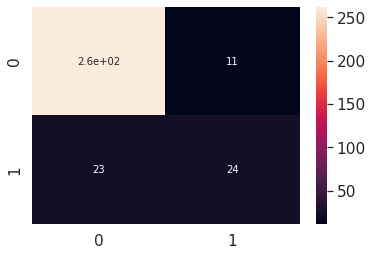

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.51      0.59        47

    accuracy                           0.89       320
   macro avg       0.80      0.74      0.76       320
weighted avg       0.88      0.89      0.89       320



In [18]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
rfc=confusion_matrix(y_test, pred_rfc)
rfc=pd.DataFrame(rfc,range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(rfc,annot=True,annot_kws={"size":10})
print('Confusion matrix')
plt.show()
print('Classification Report')
print(classification_report(y_test, pred_rfc))

單純貝式

Confusion matrix


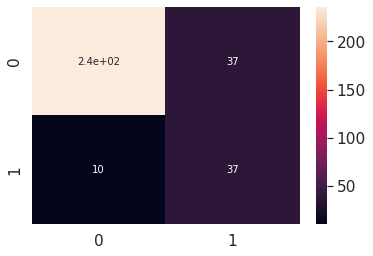

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.50      0.79      0.61        47

    accuracy                           0.85       320
   macro avg       0.73      0.83      0.76       320
weighted avg       0.89      0.85      0.87       320



In [19]:
gnb=GaussianNB(priors = None)
gnb_fit=gnb.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)
nb_conf_matrix=confusion_matrix(y_test, gnb_pred)
nb_conf_matrix=pd.DataFrame(nb_conf_matrix,range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(nb_conf_matrix,annot=True,annot_kws={"size":10})
print('Confusion matrix')
plt.show()
nb_acc_score=accuracy_score(y_test,gnb_pred)
print('Classification Report')
print(classification_report(y_test,gnb_pred))

決策樹

Confusion matrix


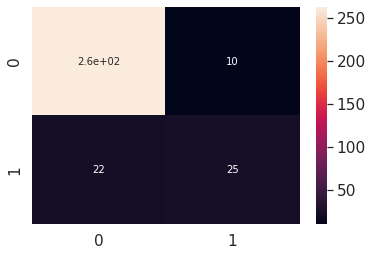

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.53      0.61        47

    accuracy                           0.90       320
   macro avg       0.82      0.75      0.78       320
weighted avg       0.89      0.90      0.89       320



In [20]:
Dtree = DecisionTreeClassifier(max_depth=6)
Dtree.fit(X_train, y_train)
pret_train = Dtree.predict(X_train)
accuracy_train=accuracy_score(y_train,pret_train)
pret_test=Dtree.predict(X_test)
accuracy_test=accuracy_score(y_test,pret_test)
dtreec=metrics.confusion_matrix(y_true=y_test,y_pred=Dtree.predict(X_test))
dtreec=pd.DataFrame(dtreec, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(dtreec,annot=True,annot_kws={"size":10})
print('Confusion matrix')
plt.show()
print('Classification Report')
print(classification_report(y_test,pret_test))